<a href="https://colab.research.google.com/github/chatlea/latihan1/blob/main/Preproccesing_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Some Python Modules
import warnings; warnings.simplefilter('ignore')
import scipy, itertools, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler


plt.style.use('bmh'); sns.set()

In [ ]:
# Memuat data dan menampilkan nama dari setiap sheets yang tersedia dalam file
file_ = 'DataPropIndo.xlsx'
try: # Running Locally
    xl = pd.ExcelFile(file_, engine = 'openpyxl')
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/{file_}
    xl = pd.ExcelFile(file_, engine = 'openpyxl')

sheets_ = xl.sheet_names
print(sheets_)

['Bogor', 'Lampung - Sumatera selatan', 'Kalimantan (All)', 'Semarang', 'Depok', 'Tangerang', 'Jakarta', 'Padang - Palembang', 'Bekasi', 'Bandung', 'Medan', 'Surabaya', 'Bali', 'Yogyakarta', 'Sulawesi(All)']


In [ ]:
# Membuat data frame area1 untuk sheet1 dan menampilkan beberapa informasi dari data
area1 = xl.parse(sheets_[0], header=0) #biasakan tidak menulis nama sheet secara langsung

N, P = area1.shape # Ukuran Data
print('baris = ', N, ', Kolom (jumlah variabel) = ', P)
print("Tipe Variabe df = ", type(area1))
area1

baris =  295 , Kolom (jumlah variabel) =  15
Tipe Variabe df =  <class 'pandas.core.frame.DataFrame'>


,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi,Unnamed: 14
0,2021-03-12 00:00:00,75,38,2,1,1,1,Bojonggede,SHM,1300,Barat,692550000,https://rumahdijual.com/bekasi/10799791-rumah-...,"Dekat tol jati warna, dekat sutle busway, deka...",NaN
1,2021-06-12 00:00:00,60,40,1,1,0,1,Babakan Madang,SHM,2200,NaN,811400000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,NaN
2,2021-06-12 00:00:00,60,50,2,2,0,1,Babakan Madang,SHM,2200,NaN,900500000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,NaN
3,2021-06-12 00:00:00,60,70,3,2,0,1,Babakan Madang,SHM,2200,NaN,1001900000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,NaN
4,2021-06-12 00:00:00,90,60,3,2,0,2,Babakan Madang,SHM,2200,NaN,1200800000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,16-08-2023,60,45,2,1,0,1,Cihampar,SHGB,1300,NaN,350000000,https://www.rumah123.com/properti/bogor/hos145...,Rumah Di Perumahan Griya Soka 1,NaN
291,2023-07-06 00:00:00,89,50,2,1,0,1,Cihampar,SHM,2200,NaN,699000000,https://www.rumah123.com/properti/bogor/hos139...,Cluster ini merupakan Perumahan Ekslusif di Ko...,NaN
292,17-05-2023,120,100,3,2,0,2,Cihampar,SHM,1300,Timur,1350000000,https://www.rumah123.com/properti/bogor/hos137...,Rumah Siap Huni di Bukit Bogor Raya Blok I 20 ...,NaN
293,16-09-2023,85,60,3,2,0,1,Cihampar,SHM,1300,Timur,530000000,https://www.rumah123.com/properti/bogor/hos131...,Perumahan di Tamansari hill akses masuk mobil ...,NaN


In [ ]:
# Membuat data frame area2 untuk sheet2 dan menampilkan beberapa informasi dari data
area2 = xl.parse(sheets_[1], header=0) #biasakan tidak menulis nama sheet secara langsung

N, P = area2.shape # Ukuran Data
print('baris = ', N, ', Kolom (jumlah variabel) = ', P)
print("Tipe Variabe df = ", type(area2))
area2

baris =  184 , Kolom (jumlah variabel) =  14
Tipe Variabe df =  <class 'pandas.core.frame.DataFrame'>


,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga (Rp),URL,deskripsi
0,27-11-2021,72,45.0,2.0,1.0,NaN,1.0,tanjung seneng bandar Lampung,SHM,1300,NaN,238000000,https://www.olx.co.id/item/rumah-murah-komersi...,keunggulan : Lokasi strategis di tengah kota\n...
1,2021-05-12 00:00:00,384,192.0,2.0,2.0,NaN,NaN,"Perumnas Mustika Raya 1, Lampung Selatan, Lampung",SHM,450 Va/R-1,NaN,300000000,https://www.olx.co.id/item/dijual-rumah-kolam-...,"terdapat 2 kolam ikan, sumur bor, tandon, mesi..."
2,2021-08-12 00:00:00,407,323.0,5.0,3.0,2.0,2.0,"Kedaton, Bandar Lampung",SHM,3500 Watt,NaN,2750000000,https://rumahdijual.com/lampung/11241855-rumah...,"Lokasi strategis, lingkungan rumah mewah, deka..."
3,2021-05-12 00:00:00,1716,1871.0,109.0,106.0,NaN,NaN,"Rajabasa, Bandar Lampung",SHM,Token,Selatan,11000000000,https://rumahdijual.com/lampung/9635319-kost-m...,FASILITAS KAMAR:\n1. Kmr lebih Besar 4x4 dg Sp...
4,2021-05-12 00:00:00,391,NaN,7.0,7.0,NaN,NaN,"Teluk Betung Utara, Bandar Lampung",SHM,Token,NaN,1000000000,https://rumahdijual.com/lampung/10121111-rumah...,"sumber air tanah, bebas banjir, butuh renovasi"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,20-04-2023,104,36.0,2.0,1.0,0.0,1.0,"Belida Darat, Muara Enim",SHM,1300,NaN,198000000,https://www.rumah123.com/properti/muara-enim/h...,Rumah komersil\nDesain modern\nLokasi Sangat S...
180,2023-04-09 00:00:00,300,285.0,4.0,3.0,0.0,1.0,"Lawang Kidul, Muara Enim",SHM,2200,NaN,950000000,https://www.rumah123.com/properti/muara-enim/h...,DIJUAL RUMAH DI PUSAT KOTA MUARA ENIM\nSHM LT ...
181,2023-04-07 00:00:00,72,36.0,2.0,1.0,0.0,0.0,"Pringsewu, Pringsewu",SHM,1300,NaN,30000000,https://www.rumah123.com/properti/pringsewu/ho...,Rumah Dijual Pringsewu Rumah di jual dengan ta...
182,2023-08-09 00:00:00,453,250.0,5.0,3.0,1.0,0.0,"Pringsewu, Pringsewu",SHM,Lainnya Watt,NaN,2750000000,https://www.rumah123.com/properti/pringsewu/ho...,Rumah di Pringsewu


In [ ]:
# Loop melalui setiap sheet dalam file Excel
# untuk membuat dataframe tiap sheets
for i, sheet in enumerate(xl.sheet_names):
    # Gunakan fungsi exec() untuk membuat variabel dinamis
    exec(f"area{i+1} = xl.parse(sheet, header=0)")

In [ ]:
#Menampilkan informasi setiap area
for i, sheet in enumerate(xl.sheet_names):
    # Gunakan fungsi exec() untuk membuat variabel dinamis
    exec(f"area{i+1} = xl.parse(sheet, header=0)")
    exec(f"N, P = area{i+1}.shape")
    print(f'Untuk area{i+1}: baris = ', N, ', Kolom (jumlah variabel) = ', P)
    print("Tipe Variabe df = ", type(eval(f"area{i+1}")))
    print(eval(f"area{i+1}"))

Untuk area1: baris =  295 , Kolom (jumlah variabel) =  15
Tipe Variabe df =  <class 'pandas.core.frame.DataFrame'>
              created_at   LT   LB  KT  KM  garasi  carport          lokasi  \
0    2021-03-12 00:00:00   75   38   2   1       1        1      Bojonggede   
1    2021-06-12 00:00:00   60   40   1   1       0        1  Babakan Madang   
2    2021-06-12 00:00:00   60   50   2   2       0        1  Babakan Madang   
3    2021-06-12 00:00:00   60   70   3   2       0        1  Babakan Madang   
4    2021-06-12 00:00:00   90   60   3   2       0        2  Babakan Madang   
..                   ...  ...  ...  ..  ..     ...      ...             ...   
290           16-08-2023   60   45   2   1       0        1        Cihampar   
291  2023-07-06 00:00:00   89   50   2   1       0        1        Cihampar   
292           17-05-2023  120  100   3   2       0        2        Cihampar   
293           16-09-2023   85   60   3   2       0        1        Cihampar   
294  2023-03-09 

Akan dilakukan preprocessing secara terpisah untuk setiap dataframe yang ada

In [ ]:
# Memeriksa tipe data di setiap kolom untuk area1
area1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   created_at   295 non-null    object
 1   LT           295 non-null    int64 
 2   LB           295 non-null    int64 
 3   KT           295 non-null    int64 
 4   KM           295 non-null    int64 
 5   garasi       295 non-null    int64 
 6   carport      295 non-null    int64 
 7   lokasi       295 non-null    object
 8   sertifikat   295 non-null    object
 9   listrik      295 non-null    int64 
 10  hadap        73 non-null     object
 11  harga        295 non-null    int64 
 12  URL          295 non-null    object
 13  deskripsi    295 non-null    object
 14  Unnamed: 14  6 non-null      object
dtypes: int64(8), object(7)
memory usage: 34.7+ KB


In [ ]:
#Mengoreksi tipe data untuk variabel di area1
area1['created_at'] = area1['created_at'].astype('datetime64')
area1['lokasi'] = area1['lokasi'].astype('category')
area1['sertifikat'] = area1['sertifikat'].astype('category')
area1['hadap'] = area1['hadap'].astype('category')
area1.dtypes

created_at     datetime64[ns]
LT                      int64
LB                      int64
KT                      int64
KM                      int64
garasi                  int64
carport                 int64
lokasi               category
sertifikat           category
listrik                 int64
hadap                category
harga                   int64
URL                    object
deskripsi              object
Unnamed: 14            object
dtype: object

In [ ]:
# Menampilkan kolom unnamed
print(area1['Unnamed: 14'])


0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
290    NaN
291    NaN
292    NaN
293    NaN
294    NaN
Name: Unnamed: 14, Length: 295, dtype: object


In [ ]:
# Menghapus kolom unnamed
area1 = area1.drop('Unnamed: 14', axis=1)
area1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   created_at  295 non-null    datetime64[ns]
 1   LT          295 non-null    int64         
 2   LB          295 non-null    int64         
 3   KT          295 non-null    int64         
 4   KM          295 non-null    int64         
 5   garasi      295 non-null    int64         
 6   carport     295 non-null    int64         
 7   lokasi      295 non-null    category      
 8   sertifikat  295 non-null    category      
 9   listrik     295 non-null    int64         
 10  hadap       73 non-null     category      
 11  harga       295 non-null    int64         
 12  URL         295 non-null    object        
 13  deskripsi   295 non-null    object        
dtypes: category(3), datetime64[ns](1), int64(8), object(2)
memory usage: 28.3+ KB


In [ ]:
# Terdapat 15 area
list_of_dataframes = [globals()[f'area{i}'] for i in range(1, 16)]

# Dapatkan nama kolom dari area1
column_names = area1.columns

# Mengubah nama kolom DataFrame lainnya untuk sesuai dengan area1
for i in range(1, 16):
    list_of_dataframes[i-1].columns = column_names

# Gabungkan semua DataFrame menjadi satu
combined_data = pd.concat(list_of_dataframes)

print(combined_data.head())

            created_at  LT    LB KT KM garasi carport          lokasi  \
0  2021-03-12 00:00:00  75  38.0  2  1      1       1      Bojonggede   
1  2021-06-12 00:00:00  60  40.0  1  1      0       1  Babakan Madang   
2  2021-06-12 00:00:00  60  50.0  2  2      0       1  Babakan Madang   
3  2021-06-12 00:00:00  60  70.0  3  2      0       1  Babakan Madang   
4  2021-06-12 00:00:00  90  60.0  3  2      0       2  Babakan Madang   

  sertifikat listrik  hadap       harga  \
0        SHM    1300  Barat   692550000   
1        SHM    2200    NaN   811400000   
2        SHM    2200    NaN   900500000   
3        SHM    2200    NaN  1001900000   
4        SHM    2200    NaN  1200800000   

                                                 URL  \
0  https://rumahdijual.com/bekasi/10799791-rumah-...   
1  https://www.rumah123.com/perumahan-baru/proper...   
2  https://www.rumah123.com/perumahan-baru/proper...   
3  https://www.rumah123.com/perumahan-baru/proper...   
4  https://www.rumah12

In [ ]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3084 entries, 0 to 164
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  3066 non-null   object 
 1   LT          3067 non-null   object 
 2   LB          3065 non-null   float64
 3   KT          3064 non-null   object 
 4   KM          3062 non-null   object 
 5   garasi      2014 non-null   object 
 6   carport     2511 non-null   object 
 7   lokasi      3066 non-null   object 
 8   sertifikat  3057 non-null   object 
 9   listrik     2842 non-null   object 
 10  hadap       1400 non-null   object 
 11  harga       3064 non-null   object 
 12  URL         3063 non-null   object 
 13  deskripsi   3041 non-null   object 
dtypes: float64(1), object(13)
memory usage: 361.4+ KB


In [ ]:
# Ubah tipe data kolom 'created_at' menjadi datetime
combined_data['created_at'] = pd.to_datetime(combined_data['created_at'])

# Ubah tipe data kolom 'lokasi', 'sertifikat', dan 'hadap' menjadi category
for col in ['lokasi', 'sertifikat', 'hadap']:
    combined_data[col] = combined_data[col].astype('category')

print(combined_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3084 entries, 0 to 164
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   created_at  3066 non-null   datetime64[ns]
 1   LT          3067 non-null   object        
 2   LB          3065 non-null   float64       
 3   KT          3064 non-null   object        
 4   KM          3062 non-null   object        
 5   garasi      2014 non-null   object        
 6   carport     2511 non-null   object        
 7   lokasi      3066 non-null   category      
 8   sertifikat  3057 non-null   category      
 9   listrik     2842 non-null   object        
 10  hadap       1400 non-null   category      
 11  harga       3064 non-null   object        
 12  URL         3063 non-null   object        
 13  deskripsi   3041 non-null   object        
dtypes: category(3), datetime64[ns](1), float64(1), object(9)
memory usage: 324.5+ KB
None


In [ ]:
# Cek kolom mana saja yang mengandung nilai NaN
nan_columns = combined_data.isna().any()

print(nan_columns)

created_at    True
LT            True
LB            True
KT            True
KM            True
garasi        True
carport       True
lokasi        True
sertifikat    True
listrik       True
hadap         True
harga         True
URL           True
deskripsi     True
dtype: bool


In [ ]:
#mengecek apakah ada duplikat data?
print(combined_data.shape) #jumlah baris dan kolom dalam DataFrame
combined_data.duplicated().sum() #jumlah baris yang duplikat

(3084, 14)


20

In [ ]:
# Menampilkan baris yang duplikat
combined_data[combined_data.duplicated() == True]

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
201,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
205,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
210,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Menghapus baris 201-216
combined_data = combined_data.drop(combined_data.index[201:217])
# Menampilkan baris yang duplikat
combined_data[combined_data.duplicated() == True]

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
176,2023-08-23,980,360.0,4,4,2.0,4.0,Kota Baru Parahyangan,SHM,11000.0,Selatan,16800000000.0,https://www.rumah123.com/properti/bandung/hos1...,"Rumah Mewah Luxury 2 Lantai, Mainroad Kota Bar..."
178,2023-09-19,148,150.0,3,2,0.0,1.0,Cicendo,SHM,3500.0,NaN,2200000000.0,https://www.rumah123.com/properti/bandung/hos1...,"Lt 148\nLb 150\nKt 3\nKm 2\nListrik 3,500\nSum..."
69,2021-06-12,108,60.0,2.0,1.0,1.0,1.0,Medan Johor,"PPJB,Girik,Adat,dll",1300.0,NaN,375000000,https://www.rumah123.com/properti/medan/hos929...,Rumah Murah Medan Johor - Karya Dharma\nHubung...
130,2023-06-06,116,80.0,3,2,0.0,1.0,Umbulharjo,SHM,3300.0,Selatan,785000000,Rumah siap huni strategis di kota Yogyakarta d...,Dijual rumah minimalis full furnish dlm cluste...


In [ ]:
# Melihat jumlah Missing Values tiap kolom
print(combined_data.isnull().sum())

created_at       2
LT               1
LB               3
KT               4
KM               6
garasi        1049
carport        545
lokasi           2
sertifikat      11
listrik        225
hadap         1624
harga            4
URL              5
deskripsi       26
dtype: int64


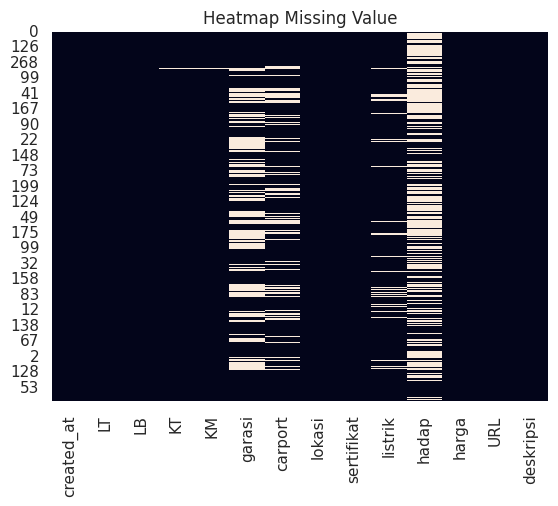

In [ ]:
# Melihat missing value dalam heatmap
sns.heatmap(combined_data.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

In [ ]:
combined_dataA = combined_data.dropna(subset=['LT'])
print(combined_dataA.isnull().sum())

created_at       1
LT               0
LB               2
KT               3
KM               5
garasi        1048
carport        544
lokasi           1
sertifikat      10
listrik        224
hadap         1623
harga            3
URL              4
deskripsi       25
dtype: int64


In [ ]:
combined_dataB = combined_dataA.dropna(subset=['LB', 'KT', 'KM', 'lokasi', 'sertifikat', 'harga'])
print(combined_dataB.isnull().sum())

created_at       0
LT               0
LB               0
KT               0
KM               0
garasi        1040
carport        533
lokasi           0
sertifikat       0
listrik        218
hadap         1610
harga            0
URL              1
deskripsi       22
dtype: int64


In [ ]:
combined_dataC = combined_dataB.drop(columns=['hadap'])
print(combined_dataC.isnull().sum())

created_at       0
LT               0
LB               0
KT               0
KM               0
garasi        1040
carport        533
lokasi           0
sertifikat       0
listrik        218
harga            0
URL              1
deskripsi       22
dtype: int64


In [ ]:
# Mencari mean dari variabel listrik
# Ubah tipe data kolom 'listrik' menjadi numerik
combined_dataC['listrik'] = pd.to_numeric(combined_dataC['listrik'], errors='coerce')

# Menghitung modus
mode_listrik = combined_dataC['listrik'].mode()[0]
mode_listrik

2200.0

In [ ]:
# Mengisi nilai yang hilang dengan modus
combined_dataC['listrik'].fillna(mode_listrik, inplace=True)

print("Nilai yang hilang di variabel 'listrik' telah diganti dengan modus.")

Nilai yang hilang di variabel 'listrik' telah diganti dengan modus.


In [ ]:
print(combined_dataC.isnull().sum())

created_at       0
LT               0
LB               0
KT               0
KM               0
garasi        1040
carport        533
lokasi           0
sertifikat       0
listrik          0
harga            0
URL              1
deskripsi       22
dtype: int64


In [ ]:
combined_dataC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2993 entries, 0 to 164
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   created_at  2993 non-null   datetime64[ns]
 1   LT          2993 non-null   object        
 2   LB          2993 non-null   float64       
 3   KT          2993 non-null   object        
 4   KM          2993 non-null   object        
 5   garasi      1953 non-null   object        
 6   carport     2460 non-null   object        
 7   lokasi      2993 non-null   category      
 8   sertifikat  2993 non-null   category      
 9   listrik     2993 non-null   float64       
 10  harga       2993 non-null   object        
 11  URL         2992 non-null   object        
 12  deskripsi   2971 non-null   object        
dtypes: category(2), datetime64[ns](1), float64(2), object(8)
memory usage: 311.4+ KB


In [ ]:
# Lihat 10 baris sembarang dari DataFrame
sample_data = combined_dataC.sample(10)

print(sample_data)


    created_at     LT     LB KT KM garasi carport            lokasi  \
152 2023-07-06     51   62.0  3  2    0.0     2.0         Cimanggis   
27  2021-05-12     77   50.0  2  1    NaN     1.0            Cinere   
21  2021-04-12     90  148.0  3  2    NaN     1.0       Mantrijeron   
5   2021-06-12  150.0  100.0  2  2    1.0     1.0          Denpasar   
82  2021-11-29     86   65.0  3  1    NaN     NaN       Mantrijeron   
20  2021-06-12     60   39.0  2  1      0       1            Parung   
90  2021-04-11     90   48.0  -  1      -       1  Mapanget, Manado   
41  2021-12-06  375.0  450.0  4  4    NaN     NaN            Wiyung   
197 2023-07-30    620  200.0  4  4    5.0     6.0           Cibodas   
124 2023-06-06    120   80.0  3  2    1.0     0.0      Bandung Kota   

    sertifikat  listrik            harga  \
152        SHM   2200.0        850000000   
27         SHM   2200.0             1100   
21         SHM   1300.0       1250000000   
5          SHM   2200.0       1300000000  

In [ ]:
var = ['garasi', 'carport']

for i in var:
   combined_dataC[i] = combined_dataC[i].replace(r'-', np.nan, regex = True)
   combined_dataC[i].fillna(value = 0, inplace = True)

combined_dataC.isna().sum()

created_at     0
LT             0
LB             0
KT             0
KM             0
garasi         0
carport        0
lokasi         0
sertifikat     0
listrik        0
harga          0
URL            1
deskripsi     22
dtype: int64

In [ ]:
combined_dataC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2993 entries, 0 to 164
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   created_at  2993 non-null   datetime64[ns]
 1   LT          2993 non-null   object        
 2   LB          2993 non-null   float64       
 3   KT          2993 non-null   object        
 4   KM          2993 non-null   object        
 5   garasi      2993 non-null   float64       
 6   carport     2993 non-null   float64       
 7   lokasi      2993 non-null   category      
 8   sertifikat  2993 non-null   category      
 9   listrik     2993 non-null   float64       
 10  harga       2993 non-null   object        
 11  URL         2992 non-null   object        
 12  deskripsi   2971 non-null   object        
dtypes: category(2), datetime64[ns](1), float64(4), object(6)
memory usage: 311.4+ KB


In [ ]:
# Saving the preprocessed Data for future use/analysis
import os
os.makedirs('data', exist_ok=True)
combined_dataC.to_csv("data/combined_PreProcessedC.csv", encoding='utf8', index=False)

In [ ]:
cols = ['LT', 'KT', 'KM', 'harga']
for col in cols:
    print(f"Jumlah '-' di kolom {col}: ", (combined_dataC[col] == '-').sum())

Jumlah '-' di kolom LT:  0
Jumlah '-' di kolom KT:  4
Jumlah '-' di kolom KM:  1
Jumlah '-' di kolom harga:  0


In [ ]:
combined_dataC['KT'] = combined_dataC['KT'].replace('-', '0')
combined_dataC['KM'] = combined_dataC['KM'].replace('-', '0')

In [ ]:
# Ubah tipe data kolom 'LT', 'KT', 'KM', menjadi int
for col in ['LT', 'KT', 'KM']:
    combined_dataC[col] = combined_dataC[col].astype(int)

In [ ]:
print(combined_dataC['harga'].describe())


count           2993
unique           892
top       1500000000
freq              54
Name: harga, dtype: int64


In [ ]:
combined_dataC.dtypes

created_at    datetime64[ns]
LT                     int64
LB                   float64
KT                     int64
KM                     int64
garasi               float64
carport              float64
lokasi              category
sertifikat          category
listrik              float64
harga                 object
URL                   object
deskripsi             object
dtype: object

In [ ]:
non_numeric = combined_dataC['harga'].apply(lambda x: not str(x).isnumeric())
print(combined_dataC[non_numeric])

   created_at   LT      LB  KT  KM  garasi  carport  \
0  2021-01-12  999   300.0   2   1     0.0      0.0   
1  2021-01-12  300    84.0   3   2     0.0      0.0   
2  2021-01-12  949   341.0   2   1     0.0      0.0   
3  2021-01-12  696   341.0   2   1     1.0      1.0   
4  2021-01-12   90    60.0   1   1     0.0      0.0   
..        ...  ...     ...  ..  ..     ...      ...   
95 2021-10-29  719  1124.0   7   8     7.0      7.0   
96 2021-10-29   90    45.0   0   1     0.0      1.0   
97 2021-10-22  800   400.0   4   5     0.0      0.0   
98 2021-10-15   55   150.0   2   1     1.0      1.0   
99 2021-10-15  180   100.0   3   2     0.0      0.0   

                                          lokasi sertifikat  listrik  \
0   Gunung Bahagia, Balikpapan, Kalimantan Timur        HGB    900.0   
1                   Balikpapan Utara, Balikpapan        SHM   1300.0   
2                     Gunung Bahagia, Balikpapan        HGB    900.0   
3                     Gunung Bahagia, Balikpapan   

In [ ]:
combined_dataD = combined_dataC.copy()

In [ ]:
# Menghapus 'RP. ' dan '.' lalu mengubah string menjadi integer
combined_dataD['harga'] = combined_dataD['harga'].apply(lambda x: x.replace('RP. ', '').replace('.', '').replace('RP', '') if isinstance(x, str) else x)

# Mengubah float menjadi integer dengan menghilangkan angka setelah titik
combined_dataD['harga'] = combined_dataD['harga'].apply(lambda x: int(x) if isinstance(x, float) else x)

In [ ]:
combined_dataD.dtypes

created_at    datetime64[ns]
LT                     int64
LB                   float64
KT                     int64
KM                     int64
garasi               float64
carport              float64
lokasi              category
sertifikat          category
listrik              float64
harga                 object
URL                   object
deskripsi             object
dtype: object

In [ ]:
# Ubah tipe data kolom 'LB', 'listrik', 'harga' menjadi int
for col in ['LB', 'listrik']:
    combined_dataD[col] = combined_dataD[col].astype(int)

In [ ]:
combined_dataD.dtypes

created_at    datetime64[ns]
LT                     int64
LB                     int64
KT                     int64
KM                     int64
garasi               float64
carport              float64
lokasi              category
sertifikat          category
listrik                int64
harga                 object
URL                   object
deskripsi             object
dtype: object

In [ ]:
print(combined_dataD['harga'])

0       692550000
1       811400000
2       900500000
3      1001900000
4      1200800000
          ...    
160    2300000000
161     675000000
162     348000000
163     175000000
164     600000000
Name: harga, Length: 2993, dtype: object


In [ ]:
# Menghapus 'Rp' dari setiap nilai di kolom 'harga'
combined_dataD['harga'] = combined_dataD['harga'].str.replace('Rp ', '')
combined_dataD['harga'] = combined_dataD['harga'].str.replace('Rp', '')

In [ ]:
combined_dataD['harga'] = combined_dataD['harga'].astype(float)

In [ ]:
combined_dataD.dtypes

created_at    datetime64[ns]
LT                     int64
LB                     int64
KT                     int64
KM                     int64
garasi               float64
carport              float64
lokasi              category
sertifikat          category
listrik                int64
harga                float64
URL                   object
deskripsi             object
dtype: object

In [ ]:
# Saving the preprocessed Data for future use/analysis
import os
os.makedirs('data', exist_ok=True)
combined_dataD.to_csv("data/combined_PreProcessedD.csv", encoding='utf8', index=False)

<Axes: >

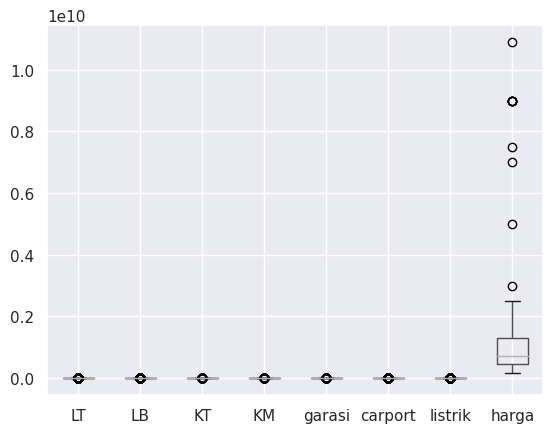

In [ ]:
#Cek noise
combined_dataD.boxplot()

<Axes: >

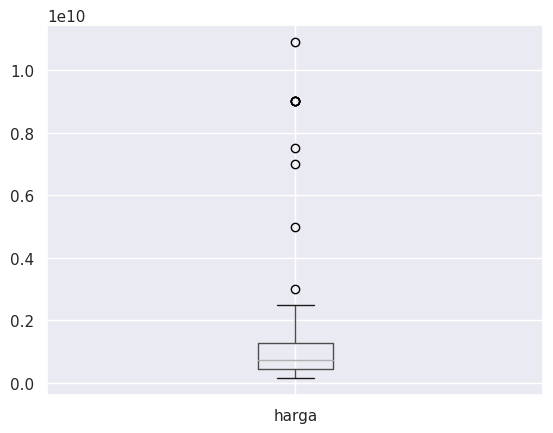

In [ ]:
combined_dataD.boxplot(column=['harga'])

In [ ]:
print(np.where(combined_dataD['harga']>1000000000000))

(array([], dtype=int64),)


In [ ]:
#Cek harga rumah pertama

combined_dataD.iloc[2045,11]

'https://www.rumah.com/listing-properti/dijual-samera-djohor-oleh-steven-19272779'

In [ ]:
#Link sebelumnya sudah tidak ada, akan dicek harga rumah kedua

combined_dataD.iloc[2626,11]

'https://www.rumah123.com/properti/semarapura/hos12342924/'

In [ ]:
#Harga salah, ganti harga sesuai url

combined_dataD.iloc[2626,10] = 2500000000

<Axes: >

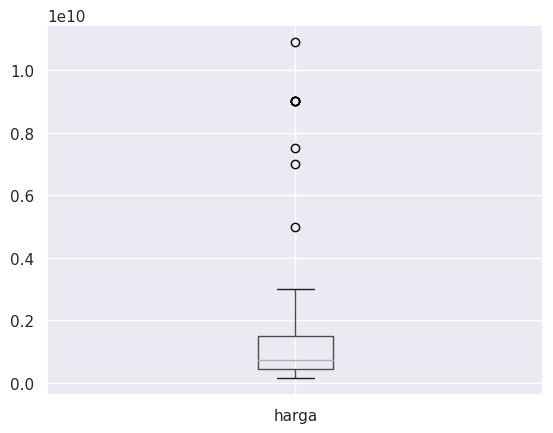

In [ ]:
combined_dataD.boxplot(column=['harga'])

<Axes: >

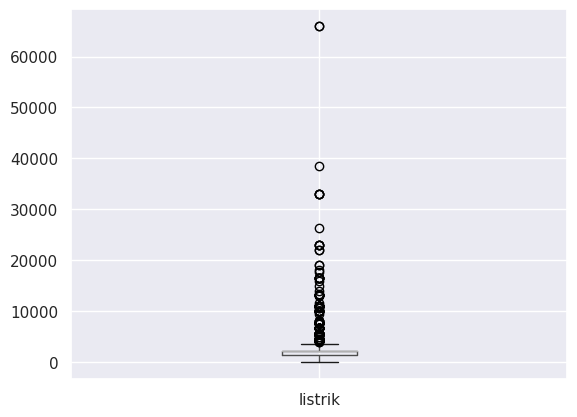

In [ ]:
combined_dataD.boxplot(column=['listrik'])

In [ ]:
print(np.where(combined_dataD['listrik']>60000))

(array([1276, 2036]),)


In [ ]:
combined_dataD.iloc[1276,11]

'https://www.rumah.com/listing-properti/dijual-dijual-murah-harga-covid-rumah-bisnis-district-2-menit-dari-grand-indonesia-thamrin-jakarta-pusat-oleh-firman-bgeac-19277814'

In [ ]:
#Link sebelumnya tidak ada, cek link kedua

combined_dataD.iloc[2036,11]

'https://www.rumah.com/listing-properti/dijual-dijual-rumah-bagus-di-sayap-dago-bandung-oleh-toni-lee-21431018'

<Axes: >

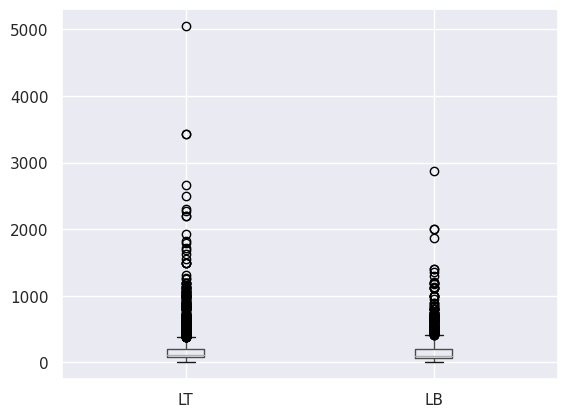

In [ ]:
combined_dataD.boxplot(column=['LT', 'LB'])

In [ ]:
print(np.where(combined_dataD['LT']>4000))

(array([2612]),)


In [ ]:
combined_dataD.iloc[2612,11]

'https://www.rumah.com/listing-properti/dijual-villa-strawbery-bangli-oleh-putra-20812057'

In [ ]:
print(np.where(combined_dataD['LB']>2500))

(array([2614]),)


In [ ]:
combined_dataD.iloc[2614,11]

'https://www.rumah.com/listing-properti/dijual-villa-kintamani-bali-lt-lb-3430-2875-int-l-award-winning-villas-good-for-invesment-oleh-nia-rianto-21235862'

<Axes: >

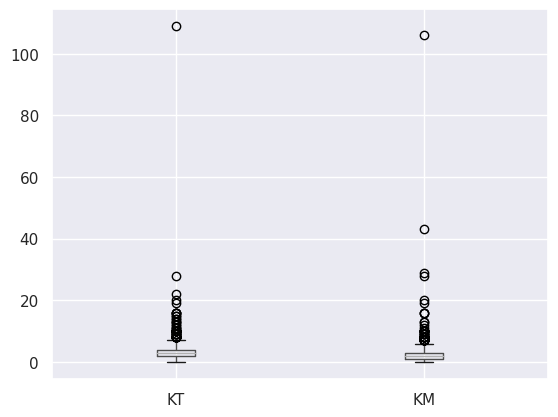

In [ ]:
combined_dataD.boxplot(column=['KT', 'KM'])

In [ ]:
print(np.where(combined_dataD['KT']>100))

(array([282]),)


In [ ]:
combined_dataD.iloc[282,11]

'https://rumahdijual.com/lampung/9635319-kost-mewah-baru-terisi-full-dengan-keuntungan-besar-bandar.html'

In [ ]:
print(np.where(combined_dataD['KM']>100))

(array([282]),)


<Axes: >

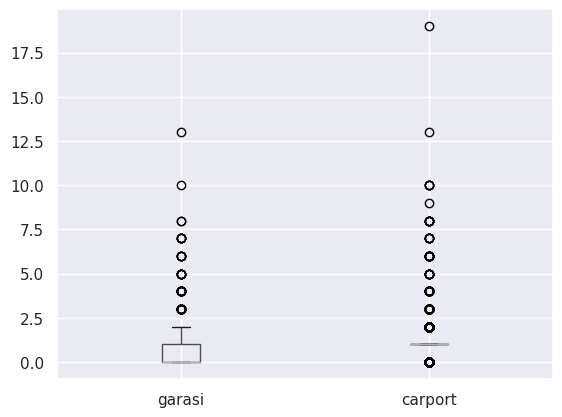

In [ ]:
combined_dataD.boxplot(column=['garasi', 'carport'])

In [ ]:
print(np.where(combined_dataD['carport']>17.5))

(array([2810]),)


In [ ]:
combined_dataD.iloc[2810,11]

'https://www.lamudi.co.id/rumah-induk-19kt-kost-k-mandi-dalam-link-premium-s-168510186213.html'

In [ ]:
Q1 = combined_dataD['harga'].quantile(0.25)
Q3 = combined_dataD['harga'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Identifikasi outlier tiap kolom
outliers = ((combined_dataD['harga'] < lower_bound) | (combined_dataD['harga'] > upper_bound))

#Dataframe outlier
combined_noout = combined_dataD[outliers]

#Hapus outlier dari dataframe sebelumnya
combined_dataE = combined_dataD[~outliers]

In [ ]:
# Saving the preprocessed Data for future use/analysis (no outlier)
import os
os.makedirs('data', exist_ok=True)
combined_dataE.to_csv("data/combined_PreProcessedD.csv", encoding='utf8', index=False)

In [ ]:
# Saving the outlier data
import os
os.makedirs('data', exist_ok=True)
combined_noout.to_csv("data/combined_PreProcessedD.csv", encoding='utf8', index=False)

In [ ]:
combined_dataD

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi
0,2021-03-12,75,38,2,1,1.0,1.0,Bojonggede,SHM,1300,NaN,https://rumahdijual.com/bekasi/10799791-rumah-...,"Dekat tol jati warna, dekat sutle busway, deka..."
1,2021-06-12,60,40,1,1,0.0,1.0,Babakan Madang,SHM,2200,NaN,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
2,2021-06-12,60,50,2,2,0.0,1.0,Babakan Madang,SHM,2200,NaN,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
3,2021-06-12,60,70,3,2,0.0,1.0,Babakan Madang,SHM,2200,NaN,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
4,2021-06-12,90,60,3,2,0.0,2.0,Babakan Madang,SHM,2200,NaN,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,2023-09-19,1030,467,2,1,0.0,1.0,"Malalayang, Manado",SHM,2200,NaN,https://www.99.co/id/properti/rumah-dijual-2mi...,*RUMAH DIJUAL MELALUI LELANG !!!*\n\nObjek : T...
161,2023-09-18,96,96,2,1,0.0,1.0,"Tanjung Bunga, Makassar, Sulawesi Selatan",SHM,3500,NaN,https://www.rumah.com/listing-properti/dijual-...,"Dijual rumah siap huni di perumahan amarylis, ..."
162,2023-09-17,115,45,2,1,0.0,1.0,"Palu Selatan, Palu, Sulawesi Tengah",SHM,1300,NaN,https://www.rumah.com/listing-properti/dijual-...,Jual Cepat Rumah bagus dan strategis Jl. Bante...
163,2023-09-14,102,72,2,1,0.0,1.0,"Puuwatu, Kendari. Sulawesi Tenggara",HGB,900,NaN,https://www.99.co/id/properti/rumah-dijual-175...,PERUMAHAN AFIKA LAND & AFIKA RESIDENCE TIPE 36...


In [ ]:
# Misalkan kita memiliki daftar lokasi yang termasuk dalam wilayah Bogor
lokasi_Bogor = area1['lokasi'].tolist()
lokasi_Lampung_SumSel = area2['lokasi'].tolist()
lokasi_Kalimantan = area3['lokasi'].tolist()
lokasi_Semarang = area4['lokasi'].tolist()
lokasi_Depok = area5['lokasi'].tolist()
lokasi_Tangerang = area6['lokasi'].tolist()
lokasi_Jakarta = area7['lokasi'].tolist()
lokasi_Padang_Palembang = area8['lokasi'].tolist()
lokasi_Bekasi = area9['lokasi'].tolist()
lokasi_Bandung = area10['lokasi'].tolist()
lokasi_Medan = area11['lokasi'].tolist()
lokasi_Surabaya = area12['lokasi'].tolist()
lokasi_Bali = area13['lokasi'].tolist()
lokasi_Yogyakarta = area14['lokasi'].tolist()
lokasi_Sulawesi = area15['lokasi'].tolist()

combined_dataD['wilayah'] = combined_dataD['lokasi'].apply(lambda x: 'Bogor' if x in lokasi_Bogor else
                                                            'Lampung_SumSel' if x in lokasi_Lampung_SumSel else
                                                            'Semarang' if x in lokasi_Semarang else
                                                            'Kalimantan' if x in lokasi_Kalimantan else
                                                            'Depok' if x in lokasi_Depok else
                                                            'Tangerang' if x in lokasi_Tangerang else
                                                            'Jakarta' if x in lokasi_Jakarta else
                                                            'Bekasi' if x in lokasi_Bekasi else
                                                            'Padang_Palembang' if x in lokasi_Padang_Palembang else
                                                            'Bandung' if x in lokasi_Bandung else
                                                            'Medan' if x in lokasi_Medan else
                                                            'Surabaya' if x in lokasi_Surabaya else
                                                            'Yogyakarta' if x in lokasi_Yogyakarta else
                                                            'Bali' if x in lokasi_Bali else
                                                            'Sulawesi' if x in lokasi_Sulawesi else x)


In [ ]:
combined_dataD.head()

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi,wilayah
0,2021-03-12,75,38,2,1,1.0,1.0,Bojonggede,SHM,1300,NaN,https://rumahdijual.com/bekasi/10799791-rumah-...,"Dekat tol jati warna, dekat sutle busway, deka...",Bogor
1,2021-06-12,60,40,1,1,0.0,1.0,Babakan Madang,SHM,2200,NaN,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,Bogor
2,2021-06-12,60,50,2,2,0.0,1.0,Babakan Madang,SHM,2200,NaN,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,Bogor
3,2021-06-12,60,70,3,2,0.0,1.0,Babakan Madang,SHM,2200,NaN,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,Bogor
4,2021-06-12,90,60,3,2,0.0,2.0,Babakan Madang,SHM,2200,NaN,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,Bogor


In [ ]:
# Saving the preprocessed Data for future use/analysis
import os
os.makedirs('data', exist_ok=True)
combined_dataD.to_csv("data/combined_PreProcessedDFinal.csv", encoding='utf8', index=False)